In [1]:
from skimage.filters import gabor_kernel
from skimage import io
from skimage.transform import resize
from matplotlib import pyplot as plt 
import numpy as np

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [1]:
# Importing the Keras libraries and packages
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam

# dimensionality of input and latent encoded representations
inpt_dim = (32, 32, 3)

inpt_img = Input(shape=inpt_dim)

# Block 1
cl1 = Conv2D(32, (9, 9), strides=(1, 1), activation='relu', input_shape = inpt_dim)(inpt_img)
bnl2 = BatchNormalization()(cl1)
# afl3 = Activation('relu')(bnl2)
pl4 = MaxPooling2D(pool_size = (2, 2))(bnl2)

# Adding a second convolutional layer
cl5 = Conv2D(128, (3, 3), strides=(1, 1), activation='relu')(pl4)
bnl6 = BatchNormalization()(cl5)
# afl7 = Activation('relu')(bnl6)
pl8 = MaxPooling2D(pool_size = (2, 2))(bnl6)
bnl9 = BatchNormalization()(pl8)

# Step 3 - Flattening
fl10 = Flatten()(bnl9)

# Step 4 - Full connection
dol11 = Dropout(0.5)(fl10)
dl12 = Dense(units = 256, activation = 'relu')(dol11)
dol13 = Dropout(0.2)(dl12)
dl14 = Dense(units = 64, activation = 'relu')(dol13)
dol15 = Dropout(0.1)(dl14)
output = Dense(units = 10, activation = 'sigmoid')(dol15)

classifier = Model(inpt_img, output)

# Compiling the CNN
opt = RMSprop(learning_rate=0.001)
# opt = Adam(learning_rate=0.01)

classifier.compile(optimizer = opt, loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

print(classifier.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 64)        15616     
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 128)       512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)        

In [4]:
# Fitting the CNN to the images

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=35, 
                         restore_best_weights=True, verbose=1)

hist = classifier.fit(x_train, y_train, batch_size=100, epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], shuffle=True, 
                   validation_data=(x_test, y_test))

classifier.save_weights("cnn.hdf5")


Epoch 1/1000
500/500 [==============================] - 21s 43ms/step - loss: 0.2770 - accuracy: 0.3538 - val_loss: 0.2501 - val_accuracy: 0.4088
Epoch 2/1000
500/500 [==============================] - 20s 40ms/step - loss: 0.2306 - accuracy: 0.4701 - val_loss: 0.2234 - val_accuracy: 0.4863
Epoch 3/1000
500/500 [==============================] - 21s 41ms/step - loss: 0.2130 - accuracy: 0.5184 - val_loss: 0.2585 - val_accuracy: 0.4212
Epoch 4/1000
500/500 [==============================] - 21s 41ms/step - loss: 0.2024 - accuracy: 0.5486 - val_loss: 0.2103 - val_accuracy: 0.5297
Epoch 5/1000
500/500 [==============================] - 22s 44ms/step - loss: 0.1937 - accuracy: 0.5712 - val_loss: 0.2268 - val_accuracy: 0.5024
Epoch 6/1000
500/500 [==============================] - 20s 39ms/step - loss: 0.1866 - accuracy: 0.5906 - val_loss: 0.1943 - val_accuracy: 0.5593
Epoch 7/1000
500/500 [==============================] - 19s 38ms/step - loss: 0.1800 - accuracy: 0.6077 - val_loss: 0.1747 -

500/500 [==============================] - 22s 43ms/step - loss: 0.0877 - accuracy: 0.8256 - val_loss: 0.1160 - val_accuracy: 0.7646
Epoch 108/1000
500/500 [==============================] - 21s 43ms/step - loss: 0.0877 - accuracy: 0.8251 - val_loss: 0.1168 - val_accuracy: 0.7609
Epoch 109/1000
500/500 [==============================] - 21s 43ms/step - loss: 0.0882 - accuracy: 0.8263 - val_loss: 0.1154 - val_accuracy: 0.7643
Epoch 110/1000
500/500 [==============================] - 21s 41ms/step - loss: 0.0884 - accuracy: 0.8235 - val_loss: 0.1154 - val_accuracy: 0.7650
Epoch 111/1000
500/500 [==============================] - 21s 43ms/step - loss: 0.0872 - accuracy: 0.8280 - val_loss: 0.1162 - val_accuracy: 0.7626
Epoch 112/1000
499/500 [============================>.] - ETA: 0s - loss: 0.0874 - accuracy: 0.8273
Epoch 00112: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
500/500 [==============================] - 20s 41ms/step - loss: 0.0874 - accuracy: 0.8272 - va

Epoch 158/1000
500/500 [==============================] - 23s 45ms/step - loss: 0.0862 - accuracy: 0.8295 - val_loss: 0.1151 - val_accuracy: 0.7656
Epoch 159/1000
500/500 [==============================] - 23s 46ms/step - loss: 0.0855 - accuracy: 0.8327 - val_loss: 0.1149 - val_accuracy: 0.7657
Epoch 160/1000
500/500 [==============================] - ETA: 0s - loss: 0.0855 - accuracy: 0.8308
Epoch 00160: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.
500/500 [==============================] - 27s 54ms/step - loss: 0.0855 - accuracy: 0.8308 - val_loss: 0.1149 - val_accuracy: 0.7654
Epoch 161/1000
500/500 [==============================] - 23s 47ms/step - loss: 0.0857 - accuracy: 0.8305 - val_loss: 0.1149 - val_accuracy: 0.7661
Epoch 162/1000
500/500 [==============================] - 24s 47ms/step - loss: 0.0851 - accuracy: 0.8327 - val_loss: 0.1149 - val_accuracy: 0.7662
Epoch 163/1000
500/500 [==============================] - 24s 49ms/step - loss: 0.0861 - accur

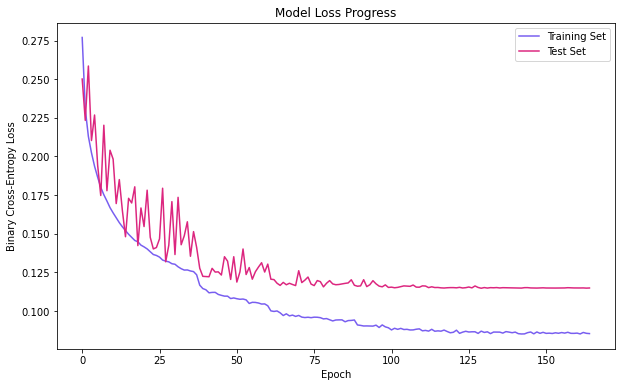

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], color='#785ef0')
plt.plot(hist.history['val_loss'], color='#dc267f')
plt.title('Model Loss Progress')
plt.ylabel('Binary Cross-Entropy Loss')
plt.xlabel('Epoch')
plt.legend(['Training Set', 'Test Set'], loc='upper right')
plt.savefig('ch.12.cnn.cifar10.loss1.png', dpi=350, bbox_inches='tight')
plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]   #get the filters
wshape = W.shape  #save the original shape

# this part will scale to [0, 1] for visualization purposes
scaler = MinMaxScaler()
scaler.fit(W.reshape(-1,1))
W = scaler.transform(W.reshape(-1,1))
W = W.reshape(wshape)

# since there are 64 filters, we will display them 8x8
fig, axs = plt.subplots(8,8, figsize=(24,24))
fig.subplots_adjust(hspace = .25, wspace=.001)
axs = axs.ravel()
for i in range(W.shape[-1]):
  # we reshape to a 3D (RGB) image shape and display
  h = np.reshape(W[:,:,:,i], (9,9,3))
  axs[i].imshow(h)
  axs[i].set_title('Filter ' + str(i))    
plt.savefig("ch.12.cnn.full.filters1.png", bbox_inches='tight', dpi=350)


-0.5906193 0.5526139


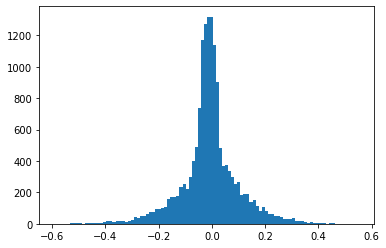

In [10]:
cnnl1 = classifier.layers[1].name   # get the name of the first conv layer
W = classifier.get_layer(name=cnnl1).get_weights()[0]
plt.hist(W.ravel(), bins=100)
print(np.min(W),np.max(W))

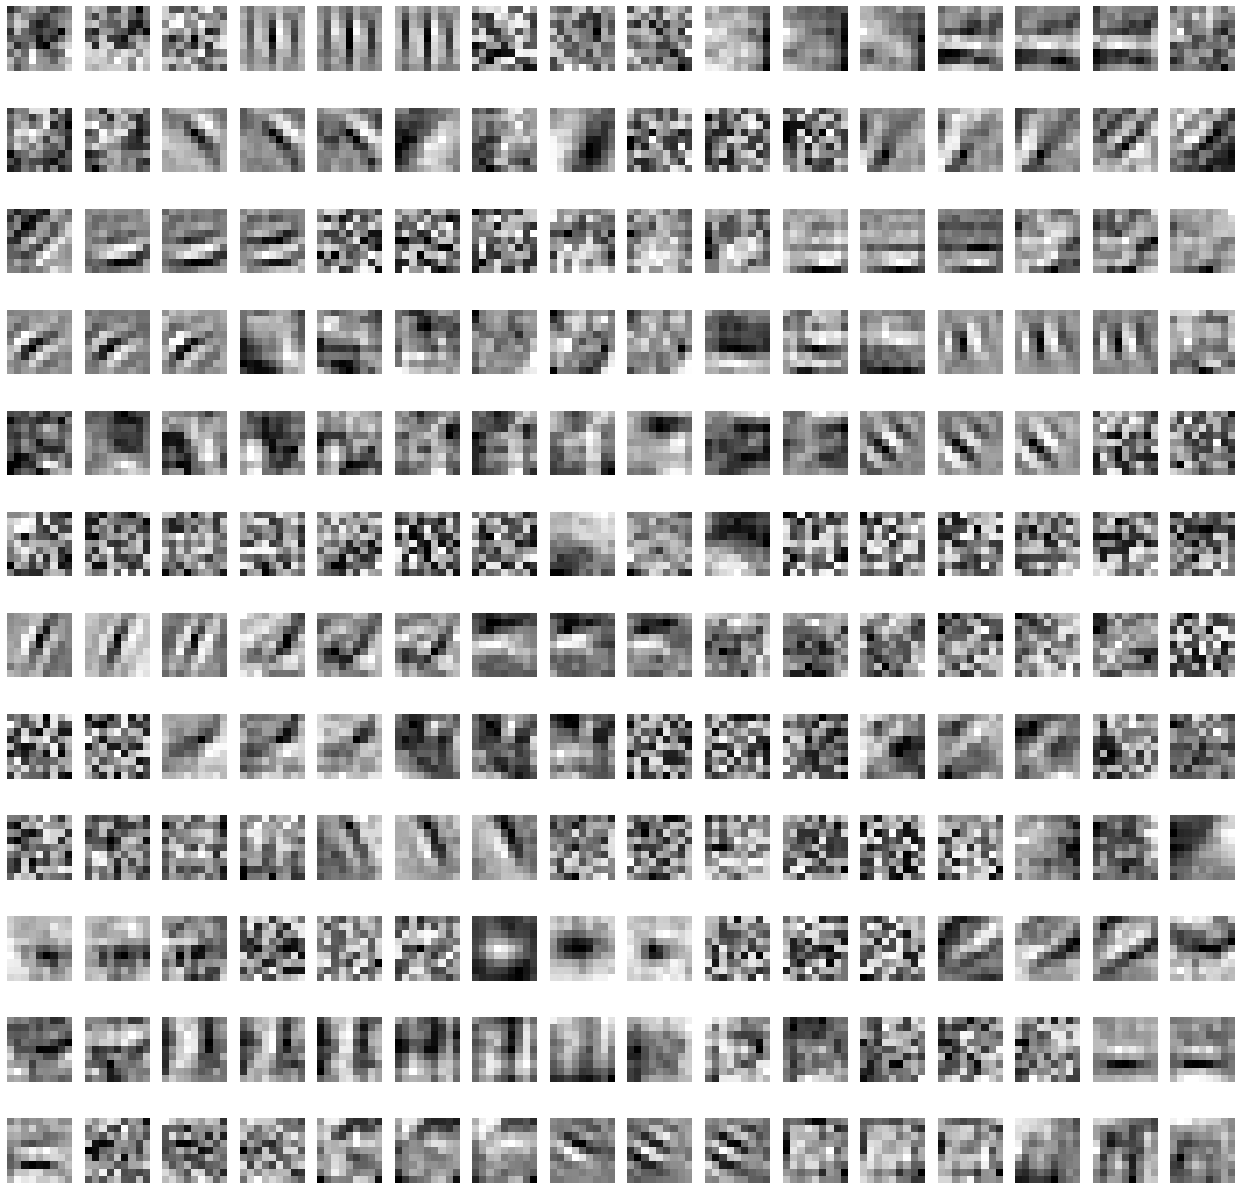

In [11]:
fig = plt.subplots(12, 16, figsize=(22,22))

filter_layers = []
for i in range(64):
    for j in range(3):
        filter_layers.append(np.reshape(W[:,:,j, i], (9,9)))
for i,gf in enumerate(filter_layers):
    plt.subplot(12, 16, i+1)
    plt.imshow(gf, cmap='gray')
    plt.axis('off')